In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
temperatura = np.array([22, 24, 21, 22, 25, 26, 25, 24, 23, 25, 25, 26, 27, 25, 26, 25, 26, 27, 27, 28, 29, 29, 29, 28, 30, 29, 30, 31, 30, 28, 29])
temperatura

array([22, 24, 21, 22, 25, 26, 25, 24, 23, 25, 25, 26, 27, 25, 26, 25, 26,
       27, 27, 28, 29, 29, 29, 28, 30, 29, 30, 31, 30, 28, 29])

In [4]:
temperatura.mean()

26.483870967741936

In [5]:
class Weighted:

    def __init__(self, l, bins):
        self.l = l
        self.bins = bins
        self.mids = self.mids()
        self.counts = self.counts()
    
    def mean(self):
        w_mean = 0
        e = 0
        a = 0
        while True:
            if a >= np.size(self.mids):
                break
            w_mean += (self.mids[a] * self.counts[a])
            e += self.counts[a]
            a +=1

        return w_mean / e

    def mids(self):
        res = np.array([])
        if np.size(self.bins) == 1:
            return bins
        elif np.size(self.bins) == 0:
            return None
        a = 0
        b = 1
        while True:
            res = np.append(res, (self.bins[a]+self.bins[b])/2)
            a = b
            b +=1
            if b >= np.size(self.bins):
                break
                
        return res

    def counts(self):
        c, b = np.histogram(self.l, bins=self.bins)
        return c

    def bins(self):
        return self.bins

    def plot(self):
        plt.hist(self.l, bins = self.bins) 

In [6]:

weighted = Weighted(temperatura, [15, 20, 25, 30, 35, 40])
#weighted.mids
#weighted.counts
weighted.mean()

27.177419354838708

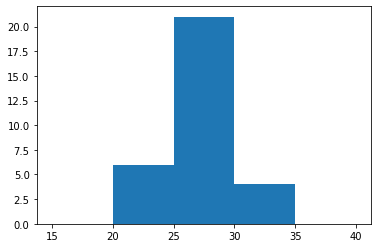

In [7]:
weighted.plot()

In [8]:
com_outliers = np.array([1, -1, 1, -1, 1, -1, 1, -1, 1000, 1, -1, 1, -1])
com_outliers

array([   1,   -1,    1,   -1,    1,   -1,    1,   -1, 1000,    1,   -1,
          1,   -1])

In [9]:
np.mean(com_outliers)

76.92307692307692

In [10]:
com_outliers = np.sort(com_outliers)
com_outliers

array([  -1,   -1,   -1,   -1,   -1,   -1,    1,    1,    1,    1,    1,
          1, 1000])

In [11]:
np.median(com_outliers)

1.0

In [12]:
temperatura = np.sort(temperatura)
temperatura

array([21, 22, 22, 23, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27,
       27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 31])

In [13]:
np.median(temperatura)

26.0

In [14]:
np.quantile(temperatura, q=[0.,0.25, 0.50, 0.75, 1.])

array([21., 25., 26., 29., 31.])

In [15]:
#R: table(temperatura) # encontrar a moda (maior ocorr?ncia)

ds_temperatura = pd.Series(temperatura)

ds_temperatura.value_counts()


25    6
29    5
26    4
30    3
28    3
27    3
24    2
22    2
31    1
23    1
21    1
dtype: int64

In [18]:
#R: prod(temperatura)^(1/length(temperatura))

ds_temperatura.prod()**(1/ds_temperatura.size)

1.9880962321146014

In [19]:
#R: timao_investimento <- c(1.01, 1.015, 1.025, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03)
#prod(timao_investimento)^(1/length(timao_investimento))

timao_investimento = pd.Series([1.01, 1.015, 1.025, 1.03, 1.03, 1.03, 1.03, 1.03, 1.03])
timao_investimento.prod()**(1/timao_investimento.size)

1.025529817713544

In [29]:
#gols_coritiba <- c(0, 0, 0, 0, 0, 0, 0, 0, 0)
#gols_athletico <- c(1, -1, 1, -1, 1, -1, 1, -1, 1)
#gols_timao <- c(5, 2, 3, 4, 1, 5, 2, 1, 10)

#range(gols_coritiba)
#range(gols_athletico)
#range(gols_timao)

ds_gols_coritiba = pd.Series([0, 0, 0, 0, 0, 0, 0, 0, 0], name='gols_coritiba')
ds_gols_athletico = pd.Series([1, -1, 1, -1, 1, -1, 1, -1, 1])
ds_gols_timao = pd.Series([5, 2, 3, 4, 1, 5, 2, 1, 10])

pd.Series([ds_gols_coritiba.min(), ds_gols_coritiba.max()])
pd.Series([ds_gols_athletico.min(), ds_gols_athletico.max()])
pd.Series([ds_gols_timao.min(), ds_gols_timao.max()])

0     1
1    10
dtype: int64

In [31]:
#R: gols <- data.frame(gols_coritiba,
#									 gols_athletico,
#									 gols_timao)

frame = { 'gols_coritiba': ds_gols_coritiba, 'gols_athletico': ds_gols_athletico, 'gols_timao': ds_gols_timao }
df_gols = pd.DataFrame(frame)
df_gols

,gols_coritiba,gols_athletico,gols_timao
0,0,1,5
1,0,-1,2
2,0,1,3
3,0,-1,4
4,0,1,1
5,0,-1,5
6,0,1,2
7,0,-1,1
8,0,1,10


In [32]:
#R: summary(gols)

df_gols.describe()

,gols_coritiba,gols_athletico,gols_timao
count,9.0,9.000000,9.000000
mean,0.0,0.111111,3.666667
std,0.0,1.054093,2.828427
min,0.0,-1.000000,1.000000
25%,0.0,-1.000000,2.000000
50%,0.0,1.000000,3.000000
75%,0.0,1.000000,5.000000
max,0.0,1.000000,10.000000


In [23]:
#R: desvio absoluto (com média e com mediana)
#mad(temperatura, center = mean(temperatura), constant = 1)  #BUG: Não bateu com o valor do R
#mad(temperatura, constant = 1)  #BUG: Não bateu com o valor do R

ds_temperatura.mad()

2.1768990634755463

In [25]:
#R:
# variancia e std com vi?s
#n = length(temperatura)
#var(temperatura)*(n-1)/n
#sd(temperatura)*sqrt((n-1)/n)

n = ds_temperatura.size
ds_temperatura.var()*(n-1)/n
ds_temperatura.std()*np.sqrt((n-1)/n)

2.576205859109859

In [33]:
# R:
# mad(gols_coritiba,  center = mean(gols_coritiba),  constant = 1);
# mad(gols_athletico, center = mean(gols_athletico), constant = 1);
# mad(gols_timao,     center = mean(gols_timao),     constant = 1);

ds_gols_coritiba.mad()
ds_gols_athletico.mad()
ds_gols_timao.mad()

2.074074074074074

In [35]:
# R:
# n = length(gols_coritiba) # mesmo n para outros gols_*
# var(gols_coritiba)*(n-1)/n
# var(gols_athletico)*(n-1)/n
# var(gols_timao)*(n-1)/n

n = ds_gols_coritiba.size # mesmo n para outros gols_*
ds_gols_coritiba.var()*(n-1)/n
ds_gols_athletico.var()*(n-1)/n
ds_gols_timao.var()*(n-1)/n

7.1111111111111125

In [37]:
# R:
# sd(gols_coritiba)*sqrt((n-1)/n)
# sd(gols_athletico)*sqrt((n-1)/n)
# sd(gols_timao)*sqrt((n-1)/n)

ds_gols_coritiba.std()*np.sqrt((n-1)/n)
ds_gols_athletico.std()*np.sqrt((n-1)/n)
ds_gols_timao.std()*np.sqrt((n-1)/n)

2.666666666666667

In [ ]:
# R:
# scale(gols_coritiba)
# scale(gols_athletico)
# scale(gols_timao)
# scale(gols)
#


In [ ]:
# R:
# sd(scale(gols_coritiba))
# sd(scale(gols_athletico))
# sd(scale(gols_timao))

In [ ]:
# R:
# (sd(gols_coritiba)*(n-1)/n)/mean(gols_coritiba)
# (sd(gols_athletico)*(n-1)/n)/mean(gols_athletico)
# (sd(gols_timao)*(n-1)/n)/mean(gols_timao)
